In [18]:
import numpy as np
import pandas as pd
import seaborn as sns   #89, 91
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from collections import Counter
from collections import defaultdict

In [19]:
dataset=pd.read_csv('nuovo_dataset_totale.csv')

In [20]:
dataset=dataset.drop(['id'], axis=1)

In [21]:
dataset

,Unnamed: 0,name,disc_number,duration_ms,explicit,popularity,track_number,artists,album_type,album_name,...,valence,tempo,time_signature,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_bars,genre,popularity_artist
0,0,Grey,1.0,290.48,False,52.0,5.0,Kölsch,album,1989,...,0.24,186.00,3.0,0.02,1.00,0.50,0.52,234.0,minimal-techno,[51.0]
1,1,Thrown,1.0,539.23,False,45.0,5.0,Kiasmos,album,Kiasmos,...,0.14,120.02,4.0,0.68,0.33,0.41,0.59,269.0,minimal-techno,[47.0]
2,2,Routine,1.0,264.20,False,39.0,5.0,Joris Delacroix,album,Night Visions,...,0.32,118.05,3.0,0.85,0.46,0.90,0.76,171.0,minimal-techno,[44.0]
3,3,Confronted - Anfisa Letyago Stranger Remix,1.0,387.41,False,0.0,6.0,Pan-Pot;Anfisa Letyago,single,Confronted Remixes,...,0.04,128.99,4.0,0.88,0.50,0.51,0.50,207.0,minimal-techno,"[36.0, 40.0]"
4,4,Jupiter Sunrise,1.0,248.96,False,0.0,1.0,Kollektiv Turmstrasse,compilation,10 Years Diynamic,...,0.12,120.00,4.0,0.88,1.00,0.47,0.46,123.0,minimal-techno,[45.0]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109144,109542,I'm Good (Blue) - REAPER Extended Remix,1.0,209.66,True,23.0,2.0,David Guetta;Bebe Rexha;REAPER,single,I'm Good (Blue) [REAPER Remix],...,0.37,173.96,4.0,0.73,1.00,0.09,0.18,145.0,edm,"[86.0, 79.0, 50.0]"
109145,109543,End Of The Night,1.0,205.72,True,56.0,1.0,Danny Avila,single,End Of The Night,...,0.31,99.97,4.0,0.71,1.00,0.40,0.54,84.0,edm,[47.0]
109146,109544,Sexy Bitch (feat. Akon),1.0,195.85,True,80.0,3.0,David Guetta;Akon,album,One More Love,...,0.80,130.01,4.0,0.81,0.99,0.10,0.33,106.0,edm,"[86.0, 79.0]"
109147,109545,Savannah,1.0,208.70,False,60.0,1.0,Diviners;Philly K.,single,Savannah,...,0.39,108.07,4.0,0.65,1.00,0.55,0.60,89.0,edm,"[47.0, 38.0]"


In [22]:
import pandas as pd

# Assuming your dataset is in a DataFrame called df

# Define the list of genres
genres_to_filter = ['sertanejo', 'folk', 'j-idol', 'world-music', 'songwriter',
                    'progressive-house', 'heavy-metal', 'mpb', 'opera', 'minimal-techno',
                    'new-age', 'sleep', 'emo', 'kids', 'honky-tonk', 'synth-pop',
                    'goth', 'happy', 'salsa', 'piano']

# Filter the dataset based on the 'genre' column
filtered_df = dataset[dataset['genre'].isin(genres_to_filter)]

# Now, filtered_df contains only the rows where the 'genre' column matches the specified genres


In [23]:
y=LabelEncoder().fit_transform(filtered_df["genre"])

# Funzione per trasformare le stringhe in liste di float
def trasforma_in_lista(lst_str):
    # Rimuovi i caratteri '[' e ']' e splitta la stringa
    lst_str = lst_str.strip('][').split(', ')
    # Utilizza eval per valutare la lista di stringhe e convertirla in una lista di float
    return [float(x) for x in lst_str]

# Applica la funzione a ciascun valore nella colonna
filtered_df['popularity_artist'] = filtered_df['popularity_artist'].apply(trasforma_in_lista)

# Calcola la media di ciascuna lista
filtered_df['popularity_artist'] = round(filtered_df['popularity_artist'].apply(np.mean),2)

X=filtered_df.drop(['name', 'Unnamed: 0', 'artists', 'disc_number','album_type', 'album_release_date', 'album_release_date_precision',
       'album_total_tracks', 'album_name', 'genre'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=72)

norm = StandardScaler()
norm.fit(X_train)

X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

C:\Users\corra\AppData\Local\Temp\ipykernel_7796\1891496897.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['popularity_artist'] = filtered_df['popularity_artist'].apply(trasforma_in_lista)
C:\Users\corra\AppData\Local\Temp\ipykernel_7796\1891496897.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['popularity_artist'] = round(filtered_df['popularity_artist'].apply(np.mean),2)


In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

In [25]:

# Define the range of values to search over for each parameter
param_grid = {
    'C': [1, 10, 100],
    'dual':[True, False],
    'max_iter': [2000, 3000],    #1000 già provato
    'tol': [0.001, 0.1, 0.01],
    #'class_weight': [{0: 1.8, 1: 1}],
}

# Create SVM classifier
svm = LinearSVC()

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=5)  # 5-fold cross-validation
grid_search.fit(X_train_norm, y_train)

# Get the best parameter values
best_params = grid_search.best_params_
print("Best parameters:", best_params)
best_score = grid_search.best_score_
print("Best cross-validated score:", best_score)

c:\Users\corra\anaconda3\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\corra\anaconda3\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\corra\anaconda3\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\corra\anaconda3\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\corra\anaconda3\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\corra\anaconda3\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number 

Best parameters: {'C': 10, 'dual': True, 'max_iter': 2000, 'tol': 0.01}
Best mean cross-validated score: 0.5368204497502319


c:\Users\corra\anaconda3\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [26]:
svm = LinearSVC(**best_params)
svm.fit(X_train_norm, y_train)

c:\Users\corra\anaconda3\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=10, dual=True, max_iter=2000, tol=0.01)

In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = svm.predict(X_test_norm)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.5445643986944514
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.51      0.55       186
           1       0.42      0.05      0.09       203
           2       0.30      0.04      0.07       187
           3       0.66      0.70      0.68       196
           4       0.51      0.72      0.59       195
           5       0.63      0.75      0.69       235
           6       0.62      0.63      0.63       196
           7       0.69      0.83      0.75       211
           8       0.67      0.88      0.76       187
           9       0.35      0.11      0.17       204
          10       0.57      0.61      0.59       215
          11       0.40      0.59      0.48       167
          12       0.47      0.27      0.34       173
          13       0.49      0.65      0.56       210
          14       0.52      0.79      0.62       202
          15       0.58      0.76      0.66       218
          16       0.72     

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get decision function scores
y_scores = svm.decision_function(X_test_norm)

# Convert decision function scores to probabilities using a sigmoid function
# Note: SVM's decision_function doesn't output probabilities directly, so we need to calibrate them
# You can use the calibration_curve function from sklearn.calibration to calibrate them, but here we'll use a simple sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

y_prob = sigmoid(y_scores)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC (Area Under the ROC Curve)
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


ValueError: multiclass format is not supported

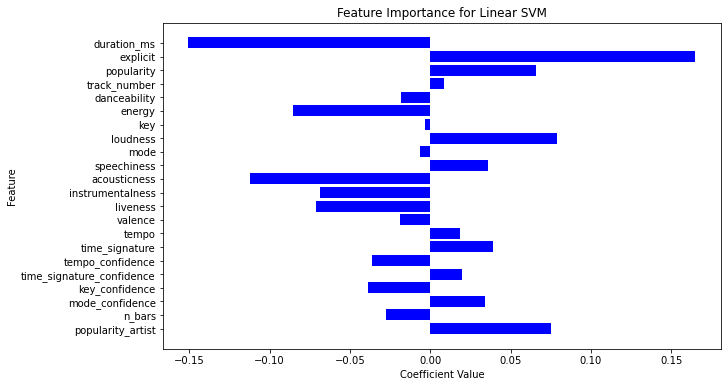

In [29]:
# Assuming you have trained a linear SVM classifier named 'svm'

# Extract feature coefficients
coefficients = svm.coef_[0]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, coefficients, color='blue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance for Linear SVM')
plt.gca().invert_yaxis()  # Invert y-axis to display features with the highest coefficient at the top
plt.show()


# SVM Non linear

In [18]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [19]:
# Define the range of values to search over for each parameter
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4],
    #'class_weight': [{0: 1.8, 1: 1}],
}

# Create SVM classifier
svm = SVC()

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train_norm, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [20]:
# Get the best parameter values
best_params = grid_search.best_params_
print("Best parameters:", best_params)
best_score = grid_search.best_score_
print("Best mean cross-validated score:", best_score)

Best parameters: {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Best mean cross-validated score: 0.9076610473061872


In [21]:
svm = SVC(**best_params)
svm.fit(X_train_norm, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test_norm)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9134226097788851
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92      1836
           1       0.89      0.91      0.90      1375

    accuracy                           0.91      3211
   macro avg       0.91      0.91      0.91      3211
weighted avg       0.91      0.91      0.91      3211

Confusion Matrix:
 [[1675  161]
 [ 117 1258]]


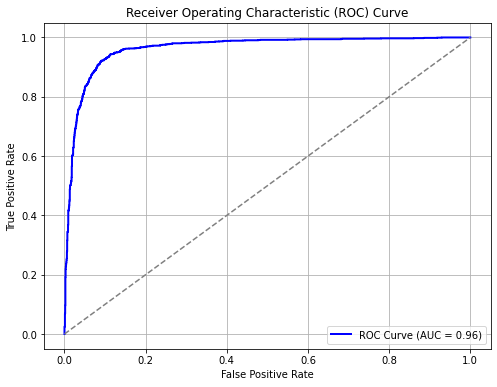

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get decision function scores
y_scores = svm.decision_function(X_test_norm)

# Convert decision function scores to probabilities using a sigmoid function
# Note: SVM's decision_function doesn't output probabilities directly, so we need to calibrate them
# You can use the calibration_curve function from sklearn.calibration to calibrate them, but here we'll use a simple sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

y_prob = sigmoid(y_scores)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC (Area Under the ROC Curve)
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

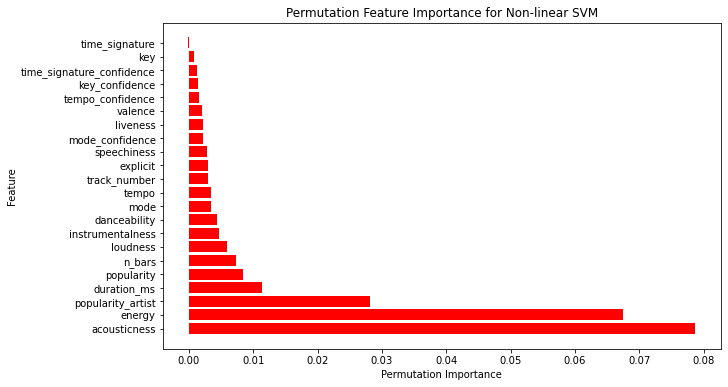

In [23]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
perm_importance = permutation_importance(svm, X_test_norm, y_test, n_repeats=10, random_state=42)

# Get feature names
feature_names = X_test.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(feature_names[sorted_idx], perm_importance.importances_mean[sorted_idx], color='red')
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.title('Permutation Feature Importance for Non-linear SVM')
plt.gca().invert_yaxis()  # Invert y-axis to display features with the highest importance at the top
plt.show()
